## City locations for mapping
Store (pickled) pandas DataFrames with US and World city locations for use in plotting.  

City information is from
https://simplemaps.com/data/us-cities and
https://simplemaps.com/data/world-cities

In [11]:
import pickle
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
us_cities = pd.read_csv('data/simplemaps_uscities_basicv1.6/uscities.csv')
us_cities.sort_values('population', ascending = False).head(30)

,city,city_ascii,state_id,state_name,county_fips,county_name,county_fips_all,county_name_all,lat,lng,population,density,source,military,incorporated,timezone,ranking,zips,id
9730,New York,New York,NY,New York,36061,New York,36061,New York,40.6943,-73.9249,19354922.0,11083.0,polygon,False,True,America/New_York,1,11229 11226 11225 11224 11222 11221 11220 1138...,1840059961
14121,Los Angeles,Los Angeles,CA,California,6037,Los Angeles,06037,Los Angeles,34.1139,-118.4068,12815475.0,3295.0,polygon,False,True,America/Los_Angeles,1,90291 90293 90292 91316 91311 90037 90031 9000...,1840107920
16289,Chicago,Chicago,IL,Illinois,17031,Cook,17031,Cook,41.8373,-87.6862,8675982.0,4612.0,polygon,False,True,America/Chicago,1,60018 60649 60641 60640 60643 60642 60645 6064...,1840021521
2882,Miami,Miami,FL,Florida,12086,Miami-Dade,12086,Miami-Dade,25.7839,-80.2102,6381966.0,4969.0,polygon,False,True,America/New_York,1,33129 33125 33126 33127 33128 33149 33144 3314...,1840012834
4464,Dallas,Dallas,TX,Texas,48113,Dallas,48113|48085|48121|48257|48397,Dallas|Collin|Denton|Kaufman|Rockwall,32.7936,-96.7662,5733259.0,1524.0,polygon,False,True,America/Chicago,1,75287 75098 75233 75254 75251 75252 75253 7503...,1840089683
11154,Philadelphia,Philadelphia,PA,Pennsylvania,42101,Philadelphia,42101,Philadelphia,40.0077,-75.1339,5637884.0,4547.0,polygon,False,True,America/New_York,1,19154 19151 19150 19153 19152 19102 19103 1910...,1840079181
5553,Houston,Houston,TX,Texas,48201,Harris,48201|48157|48339,Harris|Fort Bend|Montgomery,29.7869,-95.3905,5446468.0,1401.0,polygon,False,True,America/Chicago,1,77069 77068 77061 77060 77063 77062 77065 7706...,1840089687
697,Washington,Washington,DC,District of Columbia,11001,District of Columbia,11001,District of Columbia,38.9047,-77.0163,5289420.0,4382.0,polygon,False,True,America/New_York,1,20010 20011 20012 20015 20228 20520 20307 2041...,1840032273
17464,Atlanta,Atlanta,GA,Georgia,13121,Fulton,13121|13089|13067,Fulton|DeKalb|Cobb,33.7627,-84.4225,5228750.0,1384.0,polygon,False,True,America/New_York,1,30334 30331 30332 30309 30308 30305 30307 3030...,1840016319
19203,Boston,Boston,MA,Massachusetts,25025,Suffolk,25025,Suffolk,42.3188,-71.0846,4637537.0,5472.0,polygon,False,True,America/New_York,1,02120 02121 02122 02124 02125 02126 02127 0212...,1840040249


In [36]:
us_cities.describe()

,county_fips,lat,lng,population,density,ranking,id
count,28889.000000,28889.000000,28889.000000,2.888900e+04,28889.000000,28889.000000,2.888900e+04
mean,29898.015335,38.661767,-92.929330,1.390458e+04,513.666679,2.946519,1.838314e+09
std,15826.827987,5.891116,15.697635,1.896826e+05,787.022057,0.232708,1.913622e+07
min,1001.000000,17.955900,-176.629500,0.000000e+00,0.000000,1.000000,1.630114e+09
25%,17187.000000,35.166000,-98.303100,3.230000e+02,115.000000,3.000000,1.840041e+09
50%,30017.000000,39.382800,-90.198400,1.065000e+03,297.000000,3.000000,1.840076e+09
75%,42043.000000,41.807100,-81.770800,4.304000e+03,600.000000,3.000000,1.840111e+09
max,72153.000000,70.638000,173.123000,1.935492e+07,32085.000000,3.000000,1.840119e+09


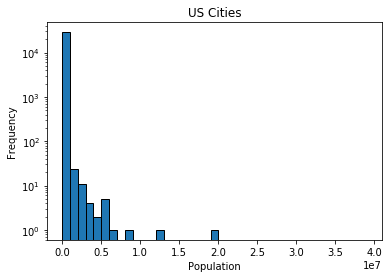

In [14]:
bins = np.arange(40)*10**6
_ = us_cities.population.plot(kind = 'hist', bins = bins, edgecolor = 'k')
_ = plt.yscale('log')
_ = plt.xlabel('Population')
_ = plt.title('US Cities')

In [4]:
big_cities = us_cities.loc[(us_cities.population > 2000000), ['city', 'population', 'lat', 'lng']]
big_cities

,city,population,lat,lng
106,Seattle,3643765.0,47.6211,-122.3244
697,Washington,5289420.0,38.9047,-77.0163
2065,Tampa,2804240.0,27.9942,-82.4451
2882,Miami,6381966.0,25.7839,-80.2102
4464,Dallas,5733259.0,32.7936,-96.7662
4576,San Antonio,2002530.0,29.4658,-98.5254
5553,Houston,5446468.0,29.7869,-95.3905
9216,Queens,2333054.0,40.7498,-73.7976
9496,Brooklyn,2629150.0,40.6501,-73.9496
9730,New York,19354922.0,40.6943,-73.9249


In [5]:
file = open('data/big_cities.pickle', 'wb')
pickle.dump(big_cities, file)
file.close()

In [6]:
file = open('data/big_cities.pickle', 'rb')
big_cities_2 = pickle.load(file)
file.close()
big_cities_2

,city,population,lat,lng
106,Seattle,3643765.0,47.6211,-122.3244
697,Washington,5289420.0,38.9047,-77.0163
2065,Tampa,2804240.0,27.9942,-82.4451
2882,Miami,6381966.0,25.7839,-80.2102
4464,Dallas,5733259.0,32.7936,-96.7662
4576,San Antonio,2002530.0,29.4658,-98.5254
5553,Houston,5446468.0,29.7869,-95.3905
9216,Queens,2333054.0,40.7498,-73.7976
9496,Brooklyn,2629150.0,40.6501,-73.9496
9730,New York,19354922.0,40.6943,-73.9249


In [7]:
world_cities = pd.read_csv('data/simplemaps_worldcities_basicv1.5/worldcities.csv')
world_cities.sort_values('population', ascending = False).head(30)

,city,city_ascii,lat,lng,country,iso2,iso3,admin_name,capital,population,id
7862,Tokyo,Tokyo,35.6850,139.7514,Japan,JP,JPN,Tōkyō,primary,35676000.0,1392685764
9792,New York,New York,40.6943,-73.9249,United States,US,USA,New York,NaN,19354922.0,1840034016
1075,Mexico City,Mexico City,19.4424,-99.1310,Mexico,MX,MEX,Ciudad de México,primary,19028000.0,1484247881
7491,Mumbai,Mumbai,19.0170,72.8570,India,IN,IND,Mahārāshtra,admin,18978000.0,1356226629
5105,São Paulo,Sao Paulo,-23.5587,-46.6250,Brazil,BR,BRA,São Paulo,admin,18845000.0,1076532519
7562,Delhi,Delhi,28.6700,77.2300,India,IN,IND,Delhi,admin,15926000.0,1356872604
5758,Shanghai,Shanghai,31.2165,121.4365,China,CN,CHN,Shanghai,admin,14987000.0,1156073548
7518,Kolkata,Kolkata,22.4950,88.3247,India,IN,IND,West Bengal,admin,14787000.0,1356060520
10465,Los Angeles,Los Angeles,34.1139,-118.4068,United States,US,USA,California,NaN,12815475.0,1840020491
4552,Dhaka,Dhaka,23.7231,90.4086,Bangladesh,BD,BGD,Dhaka,primary,12797394.0,1050529279


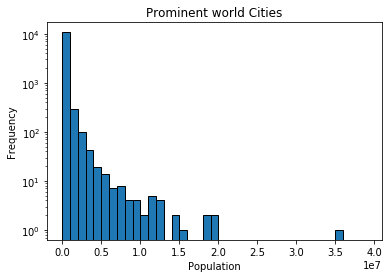

In [15]:
_ = world_cities.population.plot(kind = 'hist', bins = bins, edgecolor = 'k')
_ = plt.yscale('log')
_ = plt.xlabel('Population')
_ = plt.title('Prominent world Cities')

In [22]:
big_world_cities = world_cities.loc[(world_cities.population > 2000000), ['country', 'city', 'population', 'lat', 'lng']]
file = open('data/big_world_cities.pickle', 'wb')
pickle.dump(big_world_cities, file)
file.close()
big_world_cities.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 216 entries, 39 to 12919
Data columns (total 5 columns):
country       216 non-null object
city          216 non-null object
population    216 non-null float64
lat           216 non-null float64
lng           216 non-null float64
dtypes: float64(3), object(2)
memory usage: 10.1+ KB


In [17]:
big_cities.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 26 entries, 106 to 28361
Data columns (total 4 columns):
city          26 non-null object
population    26 non-null float64
lat           26 non-null float64
lng           26 non-null float64
dtypes: float64(3), object(1)
memory usage: 1.0+ KB


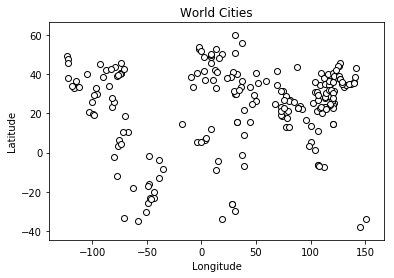

In [26]:
for longitude, latitude, name in zip(big_world_cities.lng, big_world_cities.lat, big_world_cities.city):
    plt.scatter(longitude, latitude, marker = 'o', edgecolor = 'k', c = 'w')
    #plt.text(longitude+0.1, latitude+0.1, name)
_ = plt.xlabel('Longitude')
_ = plt.ylabel('Latitude')
_ = plt.title('World Cities')

In [27]:
uk_cities = world_cities.loc[(world_cities.country == 'United Kingdom')]
uk_cities.describe()

,lat,lng,population,id
count,228.000000,228.000000,5.600000e+01,2.280000e+02
mean,53.149117,-2.335506,5.508267e+05,1.826539e+09
std,1.878082,1.993919,1.195933e+06,2.880204e+05
min,49.914600,-7.641100,6.594000e+03,1.826000e+09
25%,51.542600,-3.404975,8.139775e+04,1.826308e+09
50%,52.951800,-2.125000,2.600445e+05,1.826585e+09
75%,54.541650,-0.687500,5.020270e+05,1.826775e+09
max,60.150000,1.300000,8.567000e+06,1.826997e+09


In [31]:
big_uk_cities = uk_cities.loc[uk_cities.population >= 10**5, ['country', 'city', 'population', 'lat', 'lng']]
big_uk_cities.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 39 entries, 6809 to 7029
Data columns (total 5 columns):
country       39 non-null object
city          39 non-null object
population    39 non-null float64
lat           39 non-null float64
lng           39 non-null float64
dtypes: float64(3), object(2)
memory usage: 1.8+ KB


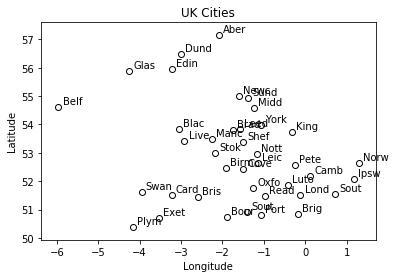

In [34]:
for longitude, latitude, name in zip(big_uk_cities.lng, big_uk_cities.lat, big_uk_cities.city):
    plt.scatter(longitude, latitude, marker = 'o', edgecolor = 'k', c = 'w')
    plt.text(longitude+0.1, latitude+0.1, name[0:4])
_ = plt.xlabel('Longitude')
_ = plt.ylabel('Latitude')
_ = plt.title('UK Cities')

In [35]:
file = open('data/uk_cities.pickle', 'wb')
pickle.dump(big_uk_cities, file)
file.close()